<a href="https://colab.research.google.com/github/namanjain0531/Projects/blob/master/cifar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


#How to Develop an Improved Model
Now that we have established a baseline model, the VGG architecture with three blocks, we can investigate modifications to the model and the training algorithm that seek to improve performance.

We will look at two main areas first to address the severe overfitting observed, namely regularization and data augmentation.

#Regularization Techniques
There are many regularization techniques we could try, although the nature of the overfitting observed suggests that perhaps early stopping would not be appropriate and that techniques that slow down the rate of convergence might be useful.

We will look into the effect of both dropout and weight regularization or weight decay.

#Dropout Regularization
Dropout is a simple technique that will randomly drop nodes out of the network. It has a regularizing effect as the remaining nodes must adapt to pick-up the slack of the removed nodes.

Dropout can be added to the model by adding new Dropout layers, where the amount of nodes removed is specified as a parameter. There are many patterns for adding Dropout to a model, in terms of where in the model to add the layers and how much dropout to use.

In this case, we will add Dropout layers after each max pooling layer and after the fully connected layer, and use a fixed dropout rate of 20% (e.g. retain 80% of the nodes).

The updated VGG 3 baseline model with dropout is listed below.

In [0]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

Using TensorFlow backend.


In [0]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [0]:
from keras.layers import Dropout
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=40, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

170500096/170498071 [==============================] - 11s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 12s 247us/step - loss: 2.0194 - accuracy: 0.2479 - val_loss: 1.7542 - val_accuracy: 0.3804
Epoch 2/40
50000/50000 [==============================] - 6s 121us/step - loss: 1.6752 - accuracy: 0.3821 - val_loss: 1.5100 - val_accuracy: 0.4533
Epoch 3/40
50000/50000 [==============================] - 6s 121us/step - loss: 1.5266 - accuracy: 0.4442 - val_loss: 1.4044 - val_accuracy: 0.4977
Epoch 4/40
50000/50000 [==============================] - 6s 120us/step - loss: 1.4344 - accuracy: 0.4760 - val_loss: 1.3031 - val_accuracy: 0.5328
Epoch 5/40
50000/50000 [==============================] - 6s 120us/step - loss: 1.3583 - accuracy: 0.5069 - val_loss: 1.2247 - val_accuracy: 0.5709
Epoch 6/40
50000/50000 [==============================] - 

In [0]:
# save model
	model.save('fourth_model.h5')

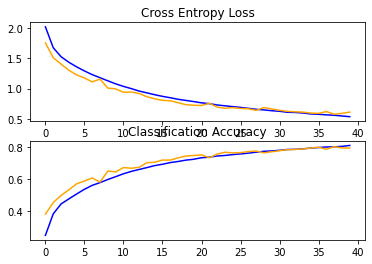

In [0]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join
## Now Predict
predict_dir_path='/content/drive/My Drive/app/image/'
onlyfiless = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiless)

['1.jpg', '5.jpg', '9.jpg', '3.jpg', '2.jpg', '4.jpg', '6.jpg', '8.jpg', '10.jpg', '7.jpg', '11.jpg', '20.jpg', '15.jpg', '12.jpg', '16.jpg', '19.jpg', '13.jpg', '14.jpg', '18.jpg', '17.jpg', '21.jpg', '29.jpg', '30.jpg', '26.jpg', '22.jpg', '24.jpg', '27.jpg', '25.jpg', '23.jpg', '28.jpg', '31.jpg', '37.jpg', '33.jpg', '36.jpg', '39.jpg', '38.jpg', '34.jpg', '32.jpg', '35.jpg', '40.jpg']


In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiless:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/fourth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

1.jpg: cat
5.jpg: airplane
9.jpg: truck
3.jpg: horse
2.jpg: truck
4.jpg: horse
6.jpg: airplane
8.jpg: airplane
10.jpg: frog
7.jpg: ship
11.jpg: horse
20.jpg: airplane
15.jpg: airplane
12.jpg: automobile
16.jpg: horse
19.jpg: deer
13.jpg: bird
14.jpg: horse
18.jpg: horse
17.jpg: horse
21.jpg: dog
29.jpg: truck
30.jpg: horse
26.jpg: frog
22.jpg: truck
24.jpg: horse
27.jpg: frog
25.jpg: frog
23.jpg: truck
28.jpg: bird
31.jpg: horse
37.jpg: truck
33.jpg: ship
36.jpg: ship
39.jpg: truck
38.jpg: truck
34.jpg: ship
32.jpg: truck
35.jpg: ship
40.jpg: truck
Total airplane : 5
Total automobile : 2
Total bird : 4
Total cat : 4
Total deer : 5
Total dog : 6
Total frog : 10
Total horse : 17
Total ship : 13
Total truck : 19


# Weight Decay
Weight regularization or weight decay involves updating the loss function to penalize the model in proportion to the size of the model weights.

This has a regularizing effect, as larger weights result in a more complex and less stable model, whereas smaller weights are often more stable and more general.

We can add weight regularization to the convolutional layers and the fully connected layers by defining the “kernel_regularizer” argument and specifying the type of regularization. In this case, we will use L2 weight regularization, the most common type used for neural networks and a sensible default weighting of 0.001.

The updated baseline model with weight decay is listed below.

In [0]:
from keras.regularizers import l2

In [0]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [0]:
# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=40, batch_size=64, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 8s 166us/step - loss: 2.9226 - accuracy: 0.3566 - val_loss: 2.6501 - val_accuracy: 0.4499
Epoch 2/40
50000/50000 [==============================] - 7s 139us/step - loss: 2.5058 - accuracy: 0.4998 - val_loss: 2.4341 - val_accuracy: 0.5157
Epoch 3/40
50000/50000 [==============================] - 7s 136us/step - loss: 2.3273 - accuracy: 0.5579 - val_loss: 2.2421 - val_accuracy: 0.5834
Epoch 4/40
50000/50000 [==============================] - 7s 137us/step - loss: 2.1796 - accuracy: 0.6050 - val_loss: 2.1415 - val_accuracy: 0.6104
Epoch 5/40
50000/50000 [==============================] - 7s 138us/step - loss: 2.0627 - accuracy: 0.6361 - val_loss: 2.0831 - val_accuracy: 0.6287
Epoch 6/40
50000/50000 [==============================] - 7s 137us/step - loss: 1.9510 - accuracy: 0.6691 - val_loss: 1.9767 - val_accuracy: 0.6554
Epoch 7/40
50000/50000 [==============================] - 7s 1

In this case, we see no much improvement in the model performance on the test set; in fact, we see a small increase in performance from about 71% to about 73% classification accuracy.

Reviewing the learning curves, we do see a small reduction in the overfitting, but the impact is not as effective as dropout.

We might be able to improve the effect of weight decay by perhaps using a larger weighting, such as 0.01 or even 0.1.

In [0]:
# save model
	model.save('fifth_model.h5')

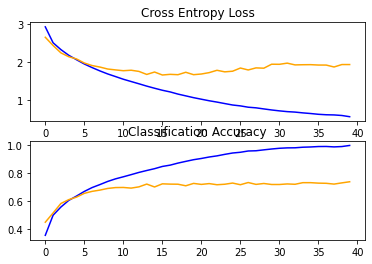

In [0]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiless:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/fifth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

1.jpg: cat
5.jpg: airplane
9.jpg: truck
3.jpg: cat
2.jpg: cat
4.jpg: cat
6.jpg: airplane
8.jpg: airplane
10.jpg: frog
7.jpg: airplane
11.jpg: automobile
20.jpg: airplane
15.jpg: truck
12.jpg: automobile
16.jpg: airplane
19.jpg: horse
13.jpg: bird
14.jpg: bird
18.jpg: deer
17.jpg: deer
21.jpg: dog
29.jpg: deer
30.jpg: horse
26.jpg: frog
22.jpg: cat
24.jpg: dog
27.jpg: frog
25.jpg: airplane
23.jpg: truck
28.jpg: airplane
31.jpg: horse
37.jpg: truck
33.jpg: ship
36.jpg: ship
39.jpg: automobile
38.jpg: truck
34.jpg: airplane
32.jpg: horse
35.jpg: ship
40.jpg: truck
Total airplane : 9
Total automobile : 4
Total bird : 4
Total cat : 8
Total deer : 7
Total dog : 7
Total frog : 9
Total horse : 11
Total ship : 11
Total truck : 15


# Data Augmentation
Data augmentation involves making copies of the examples in the training dataset with small random modifications.

This has a regularizing effect as it both expands the training dataset and allows the model to learn the same general features, although in a more generalized manner.

There are many types of data augmentation that could be applied. Given that the dataset is comprised of small photos of objects, we do not want to use augmentation that distorts the images too much, so that useful features in the images can be preserved and used.

The types of random augmentations that could be useful include a horizontal flip, minor shifts of the image, and perhaps small zooming or cropping of the image.

We will investigate the effect of simple augmentation on the baseline image, specifically horizontal flips and 10% shifts in the height and width of the image.

This can be implemented in Keras using the ImageDataGenerator class

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model
 

In [0]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
model = define_model()
# create data generator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# prepare iterator
it_train = datagen.flow(trainX, trainY, batch_size=64)
#fit model
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=40, validation_data=(testX, testY), verbose=1)
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/40
781/781 [==============================] - 26s 33ms/step - loss: 1.8403 - accuracy: 0.3317 - val_loss: 1.5115 - val_accuracy: 0.4529
Epoch 2/40
781/781 [==============================] - 23s 30ms/step - loss: 1.5166 - accuracy: 0.4537 - val_loss: 1.3412 - val_accuracy: 0.5224
Epoch 3/40
781/781 [==============================] - 23s 30ms/step - loss: 1.3749 - accuracy: 0.5059 - val_loss: 1.2595 - val_accuracy: 0.5450
Epoch 4/40
781/781 [==============================] - 23s 30ms/step - loss: 1.2723 - accuracy: 0.5468 - val_loss: 1.1346 - val_accuracy: 0.6032
Epoch 5/40
781/781 [==============================] - 23s 29ms/step - loss: 1.1909 - accuracy: 0.5776 - val_loss: 1.0849 - val_accuracy: 0.6162
Epoch 6/40
781/781 [==============================] - 23s 29ms/step - loss: 1.1254 - accuracy: 0.5999 - val_loss: 1.0478 - val_accuracy: 0.6282
Epoch 7/40
781/781 [==============================] - 23s 29ms/step - loss: 1.0573 - accuracy: 0.6288 - val_loss: 1.0369 - val_accuracy:

In this case, we see another large improvement in model performance, much like we saw with dropout. In this case, an improvement of about 9% from about 71% for the baseline model to about 80%.

In [0]:
# save model
	model.save('sixth_model.h5')

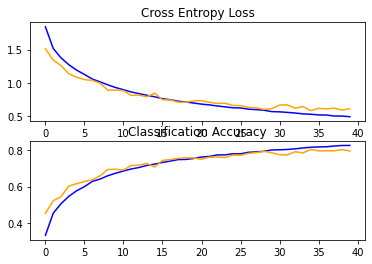

In [0]:
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

In [0]:
# predicting images
from keras.preprocessing import image
airplane = 0 
automobile=1
bird=2
cat=3
deer=4
dog=5
frog=6
horse=7
ship=8
truck=9
for file in onlyfiless:
    img = image.load_img(predict_dir_path+file, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    model = load_model('/content/sixth_model.h5')
    result = model.predict_classes(images, batch_size=10)

    
    
    if result == 0:
        print(file + ": " + 'airplane')
        airplane += 1
    elif result==1:
        print(file + ": " + 'automobile')
        automobile += 1
    elif result==2:
        print(file + ": " + 'bird')
        bird += 1
    elif result==3:
        print(file + ": " + 'cat')
        cat +=1
    elif result==4:
        print(file + ": " + 'deer')
        deer +=1
    elif result==5:
        print(file + ": " + 'dog')
        dog +=1
    elif result==6:
        print(file + ": " + 'frog')
        frog +=1
    elif result==7:
        print(file + ": " + 'horse')
        horse +=1
    elif result==8:
        print(file + ": " + 'ship')
        ship +=1
    elif result==9:
        print(file + ": " + 'truck')
        truck +=1
    
           
print("Total airplane :",airplane)
print("Total automobile :",automobile)
print("Total bird :",bird)
print("Total cat :",cat)
print("Total deer :",deer)
print("Total dog :",dog)
print("Total frog :",frog)
print("Total horse :",horse)
print("Total ship :",ship)
print("Total truck :",truck)

1.jpg: dog
5.jpg: airplane
9.jpg: automobile
3.jpg: dog
2.jpg: cat
4.jpg: dog
6.jpg: airplane
8.jpg: airplane
10.jpg: truck
7.jpg: ship
11.jpg: automobile
20.jpg: airplane
15.jpg: airplane
12.jpg: automobile
16.jpg: airplane
19.jpg: horse
13.jpg: bird
14.jpg: airplane
18.jpg: horse
17.jpg: deer
21.jpg: dog
29.jpg: airplane
30.jpg: dog
26.jpg: frog
22.jpg: truck
24.jpg: dog
27.jpg: frog
25.jpg: automobile
23.jpg: truck
28.jpg: cat
31.jpg: horse
37.jpg: truck
33.jpg: truck
36.jpg: ship
39.jpg: automobile
38.jpg: truck
34.jpg: ship
32.jpg: horse
35.jpg: ship
40.jpg: truck
Total airplane : 8
Total automobile : 6
Total bird : 3
Total cat : 5
Total deer : 5
Total dog : 11
Total frog : 8
Total horse : 11
Total ship : 12
Total truck : 16


In this section, we explored three approaches designed to slow down the convergence of the model.

A summary of the results is provided below:

Baseline + Dropout: 80.450%

Baseline + Weight Decay: 73.550%

Baseline + Data Augmentation: 80.470%

The results suggest that both dropout and data augmentation are having the desired effect, and weight decay, at least for the chosen configuration, did not.

Now that the model is learning well, we can look for both improvements on what is working, as well as combinations on what is working.